In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline


In [62]:
df = pd.read_csv("./data/FinalResultsTable1.csv")
df.tail()
df = df.drop(df.columns[0], axis=1)

In [63]:
X=df.iloc[:,0:9].values
y=df.iloc[:,8].values
df.corr()

,As,Cd,Co,Cu,Mn,Pb,Se,Zn,Fe
As,1.000000,0.234396,-0.168256,0.154670,0.482524,0.776927,0.614056,0.421276,0.631964
Cd,0.234396,1.000000,0.246863,0.696933,0.087621,0.525139,0.728715,0.312400,0.327023
Co,-0.168256,0.246863,1.000000,-0.083313,-0.675951,-0.297134,0.247743,-0.625221,-0.608533
Cu,0.154670,0.696933,-0.083313,1.000000,0.317882,0.499773,0.452354,0.481016,0.273912
Mn,0.482524,0.087621,-0.675951,0.317882,1.000000,0.726547,0.085045,0.668720,0.815812
Pb,0.776927,0.525139,-0.297134,0.499773,0.726547,1.000000,0.678939,0.554433,0.830723
Se,0.614056,0.728715,0.247743,0.452354,0.085045,0.678939,1.000000,0.174099,0.431187
Zn,0.421276,0.312400,-0.625221,0.481016,0.668720,0.554433,0.174099,1.000000,0.665575
Fe,0.631964,0.327023,-0.608533,0.273912,0.815812,0.830723,0.431187,0.665575,1.000000


In [17]:
from sklearn.preprocessing import StandardScaler as scaler
scaler.fit(X)
X=scaler.transform(X)
pca = PCA()
X_std = pca.fit_transform(X)

Text(0.5, 1, 'Correlation between different features')

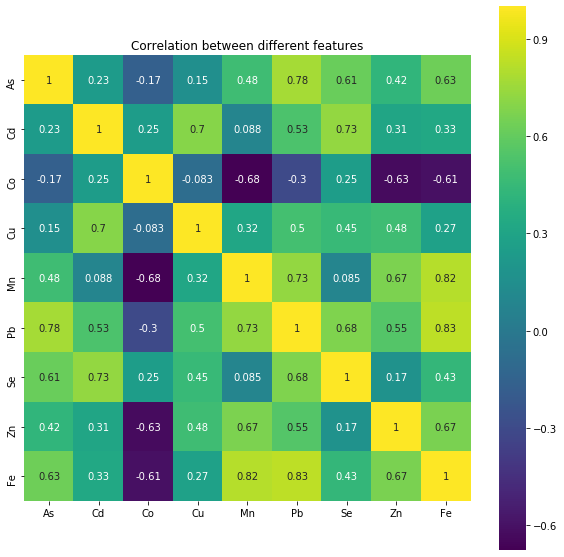

In [18]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different features')


In [25]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)
Y_sklearn.shape
        
    

(18, 2)

In [37]:
sklearn_pca.explained_variance_

array([4.14079262, 2.22026916])

In [38]:
sklearn_pca.explained_variance_ratio_

array([0.48884357, 0.26211511])

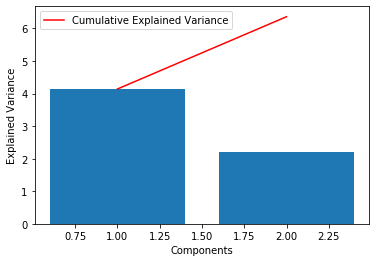

In [40]:
plt.bar(range(1, len(sklearn_pca.explained_variance_)+1),sklearn_pca.explained_variance_ )
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.plot(range(1,len(sklearn_pca.explained_variance_ )+1),
        np.cumsum(sklearn_pca.explained_variance_),
        c='red',
        label="Cumulative Explained Variance")
plt.legend(loc='upper left')


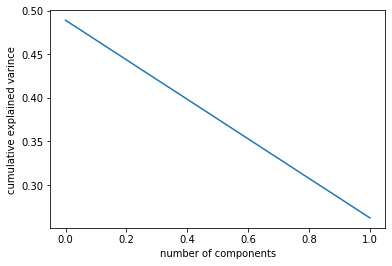

In [43]:
plt.plot(sklearn_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained varince')
plt.show()

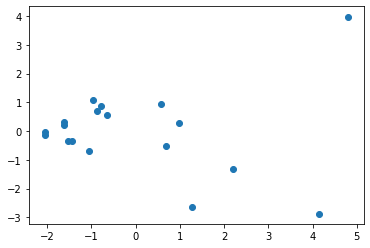

In [36]:
plt.scatter(Y_sklearn[:,0], Y_sklearn[:, 1])

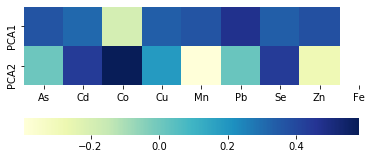

In [64]:
ax = sns.heatmap(sklearn_pca.components_, 
                cmap='YlGnBu',
                yticklabels=["PCA"+str(x) for x in range(1, sklearn_pca.n_components_+1)],
                xticklabels=['As','Cd','Co', 'Cu', 'Mn', 'Pb', 'Se', 'Zn', 'Fe'],
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

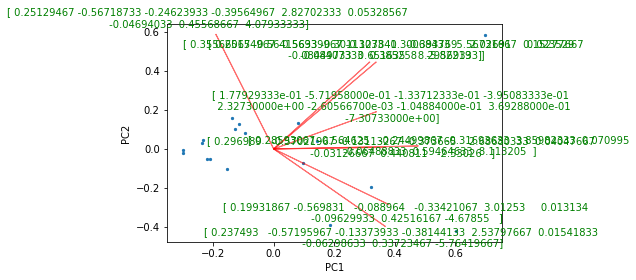

In [71]:
def myplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, s=5)
    for i in range(n): 
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1] * 1.15,
            "Var"+str(i+1), color = 'green', ha='center', va='center')
        else:
            plt.text(coeff[i, 0]*1.15, coeff[i, 1]*1.15,
                    labels[i], color='g', ha='center', va='center')
            plt.xlabel("PC{}".format(1))
            plt.ylabel("PC{}".format(2))
            plt.grid()
        
                   
myplot(Y_sklearn[:,0:2], np.transpose(sklearn_pca.components_[0:2,
                                                       :]), list(X))
plt.show()                   